In [63]:
# Imports
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import csv
import importlib
from tqdm import tqdm
from scripts import proj1_helpers, helpers
from scripts import implementation, feature_processing, k_fold, model_linear, model_logistic
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
train_path = '../data/train.csv'
test_path  = '../data/test.csv'

In [3]:
# loading data
y, X, idx = proj1_helpers.load_csv_data(train_path)
y_t, X_t, ids_t = proj1_helpers.load_csv_data(test_path)

In [10]:
deg = 5
X_p, (x_mean, x_std) = feature_processing.process_X(X, deg)
X_t_p, _ = feature_processing.process_X(X_t, deg, (x_mean, x_std))

100%|██████████| 5/5 [01:39<00:00, 16.63s/it]


In [12]:
#Logistic
y_01 = helpers.y_to_01(np.array([y]).T)
np.random.seed(1)
w0 = np.zeros((X_p.shape[1], 1))

100%|██████████| 20/20 [00:37<00:00,  1.88s/epoch, acc=-0.81, grad=59.9, loss=7.15e+04, w=137] 


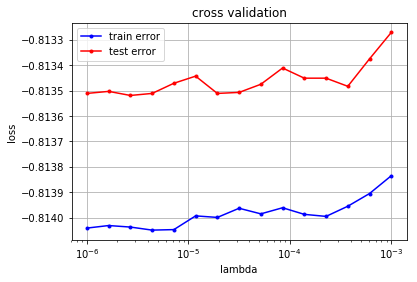

In [162]:
model = implementation.reg_logistic_regression_newton#_batch
model_args = {'initial_w': w0, 'max_iters': 20, 'gamma': 1e-1, 'debug': False}#, 'batch_size': 50000}
loss = model_linear.compute_accuracy_loss

lambdas = np.logspace(-6, -3, 15)

idx_min, rmse_all, lambdas = k_fold.cross_validation_select(X_p, y_01, model, loss, kw_model = model_args, seed = 1,
                                                            k_fold = 3, lambdas = lambdas, do_plot = True, do_tqdm = False)

In [75]:
lambda_ = lambdas[idx_min]
print(lambda_)

4.64158883361e-06


 83%|████████▎ | 834/1000 [03:57<00:43,  3.78epoch/s, acc=-0.79, diff=278, grad=1.14e+03, loss=1.11e+05, w=4.02]     


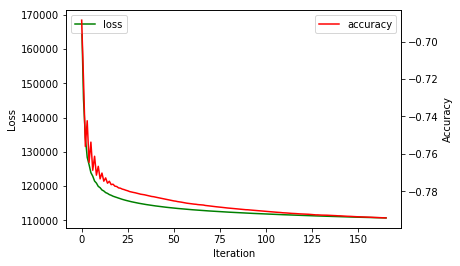

In [76]:
np.random.seed(42)
w11, l = implementation.reg_logistic_regression_batch(y_01, X_p, lambda_ = lambda_,
                                                      initial_w = w0, max_iters = 1000, gamma = 1e-5,
                                                      debug = 'plot', batch_size = 50000)

 83%|████████▎ | 250/300 [01:13<00:12,  3.85epoch/s, acc=-0.79, diff=267, grad=862, loss=1.11e+05, w=4.08]


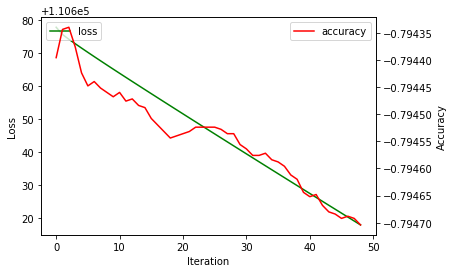

In [103]:
np.random.seed(42)
w12, l = implementation.reg_logistic_regression_batch(y_01, X_p, lambda_ = lambda_,
                                                      initial_w = w11, max_iters = 300, gamma = 1e-6,
                                                      debug = 'plot', batch_size = 50000)

 83%|████████▎ | 250/300 [01:13<00:15,  3.17epoch/s, acc=-0.78, diff=924, grad=1.27e+03, loss=1.14e+05, w=2.59]     


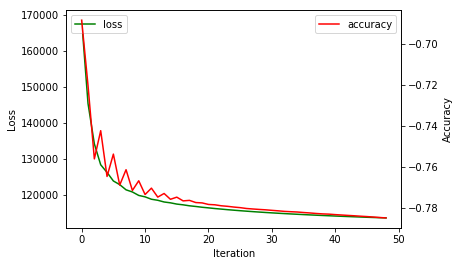

In [113]:
np.random.seed(42)
w101, l = implementation.reg_logistic_regression_batch(y_01, X_p, lambda_ = 0.1,
                                                      initial_w = w0, max_iters = 300, gamma = 1e-5,#1e-5,
                                                      debug = 'plot', batch_size = 50000)

100%|██████████| 50/50 [02:39<00:00,  5.00s/epoch, acc=-0.82, grad=22.2, loss=1.01e+05, w=481]


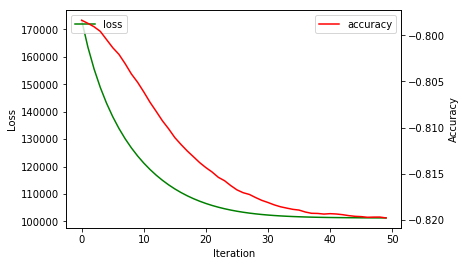

In [146]:
np.random.seed(42)
w01, l = implementation.reg_logistic_regression_newton(y_01, X_p, lambda_ = 1e-4,
                                                      initial_w = w0, max_iters = 50, gamma = 1e-1,
                                                      debug = 'plot')#'plot')#, batch_size = 50000)

100%|██████████| 20/20 [01:05<00:00,  3.30s/epoch, acc=-0.82, grad=3.84, loss=1.01e+05, w=493]


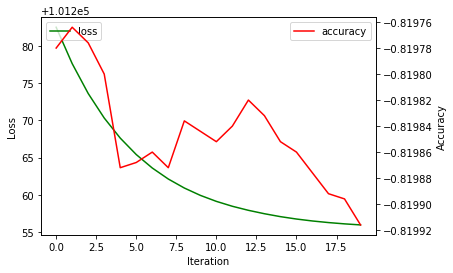

In [165]:
np.random.seed(42)
w010, l = implementation.reg_logistic_regression_newton(y_01, X_p, lambda_ = 1e-4,
                                                      initial_w = w01, max_iters = 20, gamma = 0.1,
                                                      debug = 'plot')#'plot')#, batch_size = 50000)

In [167]:
y_pred = proj1_helpers.predict_labels(w010, X_t_p)

In [168]:
output_path = '../data/logreg_1_submission.csv'
proj1_helpers.create_csv_submission(ids_t, y_pred, output_path)

In [30]:
tqdm.get_lock().locks = []
from tqdm import tqdm